<a href="https://colab.research.google.com/github/krshrimali/FastAI-Deeplearning-For-Coders/blob/master/FastAI_PETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# some magic commands
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# set batch size
bs = 32 

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# let's import the dataset
# we'll be working on Oxford-IIIT Pets Dataset (generated in 2012)
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
# let's check what the folder contains
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:5] # let's print initial 5 file names

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_93.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_143.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_42.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_139.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_6.jpg')]

In [0]:
np.random.seed(2)
pattern = re.compile(r'/([^/]+)_\d+.jpg$')

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pattern, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

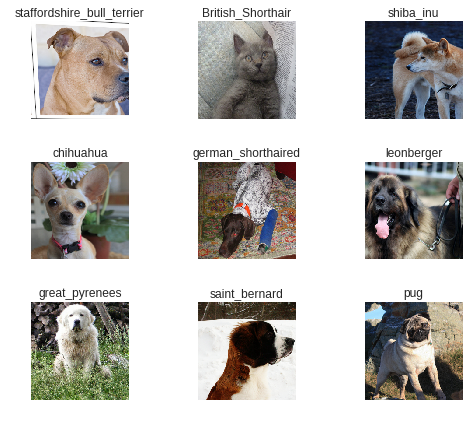

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [0]:
# training a resnet34 architecture
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28099443.40it/s]
